In [171]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load generated graphs

In [172]:
def aspl_hour(graphs):
    c = []
    tot_hours_dataset = (len(graphs)*300/3600)

    for hour_n in range(int(tot_hours_dataset)):
        G_aggr = get_weighted_graph(graphs[int(3600/300)*hour_n:int(3600/300)*(hour_n+1)])
        if not len(G_aggr.nodes()) == 0:
            largest_cc = max(nx.connected_components(G_aggr), key=len) # get the biggest connected components
            sub_G = G_aggr.subgraph(largest_cc).copy()  # get subgrph
            c.append(nx.average_shortest_path_length(sub_G))

    return c

def smetric_hour(graphs):
    c = []
    tot_hours_dataset = len(graphs)*300/3600
    for hour_n in range(int(tot_hours_dataset)):
        G_aggr = get_weighted_graph(graphs[int(3600/300)*hour_n:int(3600/300)*(hour_n+1)])

        c.append(s_metric([G_aggr])[0])
        
    return c

def load_origin_graph(file_name,gap):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name,gap):
    
    path = "../Generated_graphs/ETNgen-"+file_name+".dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_tag_graph(file_name,gap):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)

    return graphs_in

import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# load SI dataset

In [173]:
file_name = "High_School12"
file_name = "High_School13"
file_name = "primary_school"

m = 1
ori = load_origin_graph(file_name,gap=299*m)
etn_gen = load_ETNgen_graph(file_name,gap=299*m)
tag_gen = load_tag_graph(file_name,gap=m-1)

In [ ]:
len(ori),len(etn_gen),len(tag_gen)

In [ ]:
e = compute_all_metrics_comphy(ori,etn_gen)

sm_o = smetric_hour(ori)
sm_e = smetric_hour(etn_gen)
sm = stats.ks_2samp(sm_o,sm_e)[0]
print("hour smetric ",sm)
e.append((sm,0))
asp_o = aspl_hour(ori)
asp_e = aspl_hour(etn_gen)
hasp = stats.ks_2samp(asp_o,asp_e)[0]
print("hour asp", hasp)
e.append((hasp,0))

In [ ]:
t = compute_all_metrics_comphy(ori,tag_gen)


sm_t = smetric_hour(tag_gen)
sm = stats.ks_2samp(sm_o,sm_t)[0]
print("hour smetric ",sm)
t.append((sm,0))
asp_t = aspl_hour(tag_gen)
hasp = stats.ks_2samp(asp_o,asp_t)[0]
print("hour asp", hasp)
t.append((hasp,0))

In [ ]:
ee = np.array(e)[:,0]
tt = np.array(t)[:,0]
x = np.arange(len(ee))
plt.bar(x-0.1,ee,width=0.2)
plt.bar(x+0.1,tt,width=0.2)

In [ ]:
hclo = hour_closeness(ori)
hbet = hour_betweenness(ori,False)
whbet = hour_betweenness(ori,True)
concom = nb_connected_components(ori)
hmod = hour_modularity(ori)
hclu = hour_clustering(ori)
hass =hour_assort(ori)

np.save("topology_results/original_distributions/"+file_name+"/hclo.npy",hclo)
np.save("topology_results/original_distributions/"+file_name+"/hbet.npy",hbet)
np.save("topology_results/original_distributions/"+file_name+"/whbet.npy",whbet)
np.save("topology_results/original_distributions/"+file_name+"/concomp.npy",concom)
np.save("topology_results/original_distributions/"+file_name+"/hmod.npy",hmod)
np.save("topology_results/original_distributions/"+file_name+"/hclu.npy",hclu)
np.save("topology_results/original_distributions/"+file_name+"/hass.npy",hass)


sm_e = smetric_hour(ori)
np.save("topology_results/original_distributions/"+file_name+"/hs_metric.npy",sm_e)
asp_e = aspl_hour(ori)
np.save("topology_results/original_distributions/"+file_name+"/hasp.npy",asp_e)

In [ ]:
hclo = hour_closeness(etn_gen)
hbet = hour_betweenness(etn_gen,False)
whbet = hour_betweenness(etn_gen,True)
concom = nb_connected_components(etn_gen)
hmod = hour_modularity(etn_gen)
hclu = hour_clustering(etn_gen)
hass =hour_assort(etn_gen)

np.save("topology_results/SI/etngen/"+file_name+"/hclo.npy",hclo)
np.save("topology_results/SI/etngen/"+file_name+"/hbet.npy",hbet)
np.save("topology_results/SI/etngen/"+file_name+"/whbet.npy",whbet)
np.save("topology_results/SI/etngen/"+file_name+"/concomp.npy",concom)
print("meta")
np.save("topology_results/SI/etngen/"+file_name+"/hmod.npy",hmod)
np.save("topology_results/SI/etngen/"+file_name+"/hclu.npy",hclu)
np.save("topology_results/SI/etngen/"+file_name+"/hass.npy",hass)

print("quasi")
sm_e = smetric_hour(etn_gen)
np.save("topology_results/SI/etngen/"+file_name+"/hs_metric.npy",sm_e)
asp_e = aspl_hour(etn_gen)
np.save("topology_results/SI/etngen/"+file_name+"/hasp.npy",asp_e)

In [ ]:
hclo = hour_closeness(tag_gen)
hbet = hour_betweenness(tag_gen,False)
whbet = hour_betweenness(tag_gen,True)
concom = nb_connected_components(tag_gen)
hmod = hour_modularity(tag_gen)
hclu = hour_clustering(tag_gen)
hass =hour_assort(tag_gen)

np.save("topology_results/SI/taggen/"+file_name+"/hclo.npy",hclo)
np.save("topology_results/SI/taggen/"+file_name+"/hbet.npy",hbet)
np.save("topology_results/SI/taggen/"+file_name+"/whbet.npy",whbet)
np.save("topology_results/SI/taggen/"+file_name+"/concomp.npy",concom)
print("meta")
np.save("topology_results/SI/taggen/"+file_name+"/hmod.npy",hmod)
np.save("topology_results/SI/taggen/"+file_name+"/hclu.npy",hclu)
np.save("topology_results/SI/taggen/"+file_name+"/hass.npy",hass)
print("quasi")
sm_t = smetric_hour(tag_gen)
np.save("topology_results/SI/taggen/"+file_name+"/hs_metric.npy",sm_t)
asp_t = aspl_hour(tag_gen)
np.save("topology_results/SI/taggen/"+file_name+"/hasp.npy",asp_t)

## call sms

In [3]:
def load_origin_graph(file_name,gap = 599):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    
    graphs_in = cs.build_graphs(data_in,gap=599)
    return graphs_in

def load_ETNgen_graph(file_name,gap = 299):
    
    path = "../Generated_graphs/ETNgen-"+file_name+".dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_599_generato_TagGen.dat"
    gap = 0
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)

    return graphs_in

In [34]:

file_name = "DTU_calls_1sett"
#file_name = "DTU_SMS_1sett"
#file_name = "FF_calls_1sett"
#file_name = "FF_SMS_1sett"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
tag_gen = load_tag_graph(file_name)

In [35]:
len(ori),len(etn_gen),len(tag_gen)

(1003, 1005, 1003)

In [36]:
def nint(g):
    res = []
    for n in g:
        res.append(len(n.edges()))
    return res

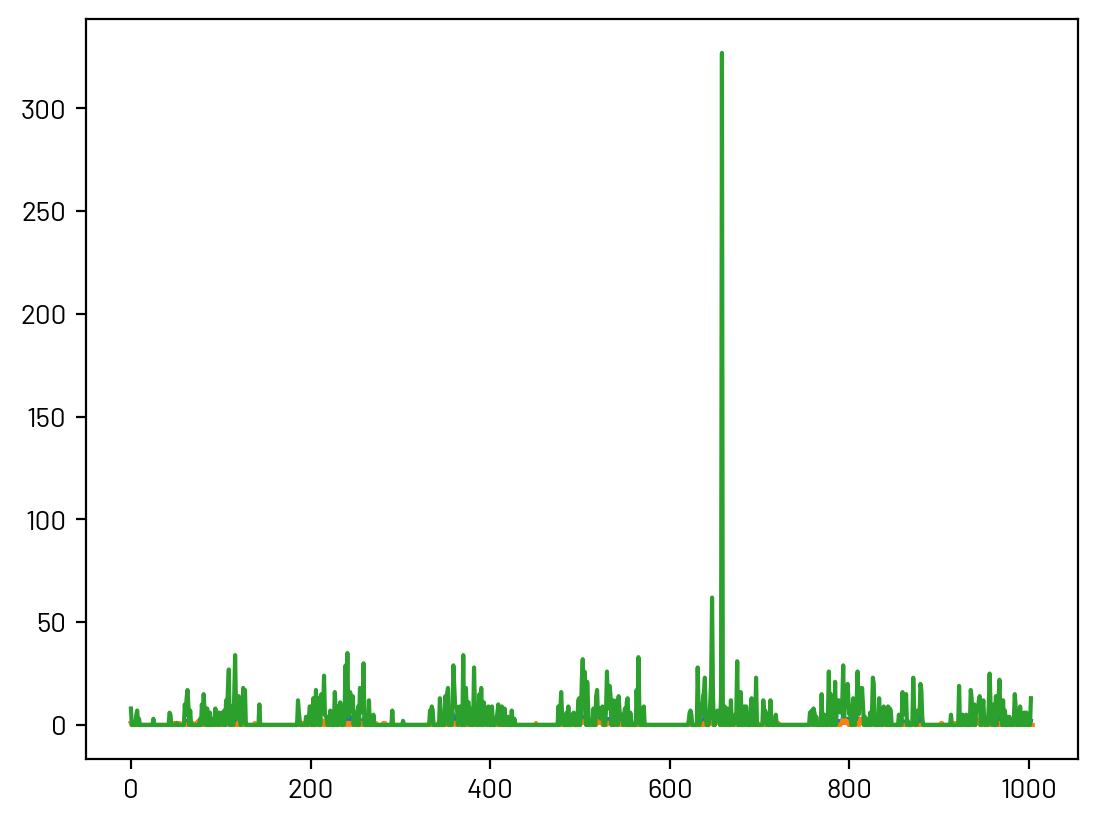

In [37]:
plt.plot(nint(ori))
plt.plot(nint(etn_gen))
plt.plot(nint(tag_gen))

In [38]:
e = compute_all_metrics_comphy(ori,etn_gen)

sm_o = smetric_hour(ori)
sm_e = smetric_hour(etn_gen)
sm = stats.ks_2samp(sm_o,sm_e)[0]
print("hour smetric ",sm)
e.append((sm,0))
asp_o = aspl_hour(ori)
asp_e = aspl_hour(etn_gen)
hasp = stats.ks_2samp(asp_o,asp_e)[0]
print("hour asp", hasp)
e.append((hasp,0))

hour_closeness 	 0.108 0.716927
hour_betweenness 	 0.145 0.352556
W hour_betweenness 	 0.145 0.352556
nb_connected_components	 0.111 0.000007
hour_modularity f 	 0.155 0.387825


/home/antonio/Desktop/Dottorato/2021-20/GRAPHGEN/github/ETNgen/Evaluation/topological_metrics.py:20: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  s,p = stats.ks_2samp(metrics_in,metrics_gen)


hour_clustering 	 0.012 1.000000
hour_assort 	 0.190 0.947907
hour smetric  0.1927710843373494
hour asp 0.1504879301489471


In [39]:
t = compute_all_metrics_comphy(ori,tag_gen)


sm_t = smetric_hour(tag_gen)
sm = stats.ks_2samp(sm_o,sm_t)[0]
print("hour smetric ",sm)
t.append((sm,0))
asp_t = aspl_hour(tag_gen)
hasp = stats.ks_2samp(asp_o,asp_t)[0]
print("hour asp", hasp)
t.append((hasp,0))

hour_closeness 	 0.639 0.000000
hour_betweenness 	 0.771 0.000000
W hour_betweenness 	 0.771 0.000000
nb_connected_components	 0.317 0.000000
hour_modularity f 	 0.727 0.000000
hour_clustering 	 0.627 0.000000
hour_assort 	 0.843 0.000000
hour smetric  0.7590361445783133
hour asp 0.9696969696969697


<BarContainer object of 9 artists>

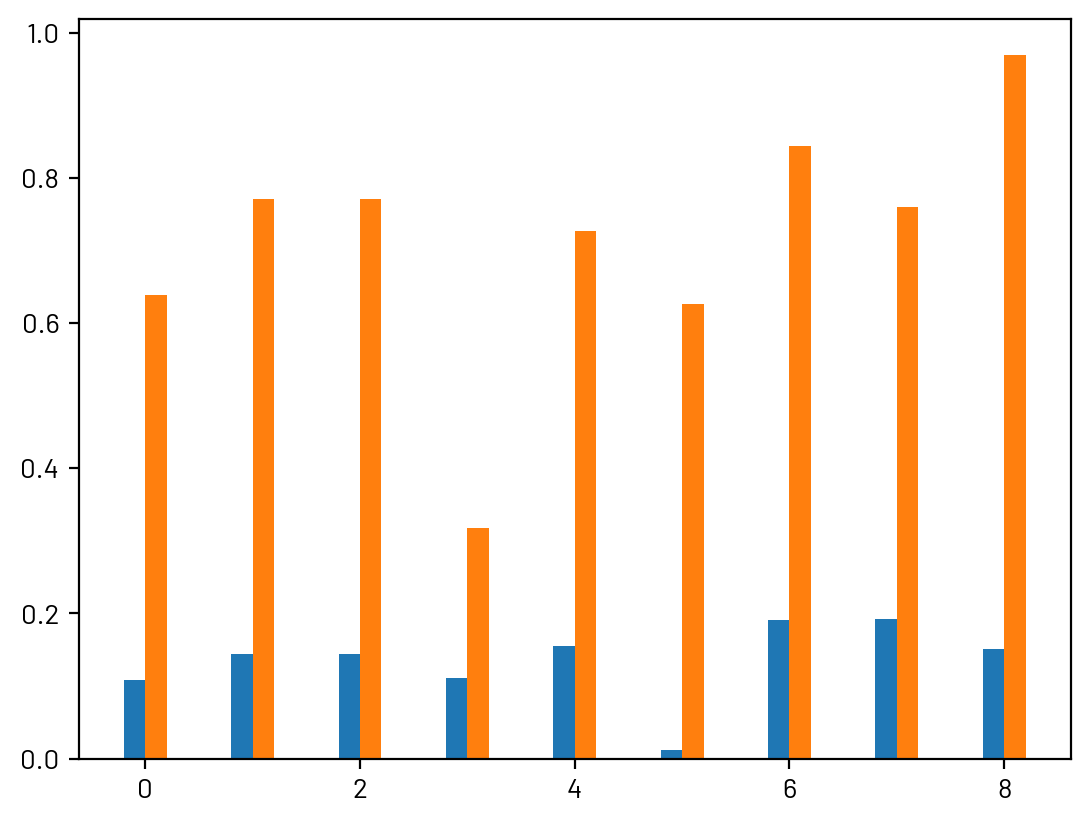

In [40]:
ee = np.array(e)[:,0]
tt = np.array(t)[:,0]
x = np.arange(len(ee))
plt.bar(x-0.1,ee,width=0.2)
plt.bar(x+0.1,tt,width=0.2)

In [41]:
hclo = hour_closeness(ori)
hbet = hour_betweenness(ori,False)
whbet = hour_betweenness(ori,True)
concom = nb_connected_components(ori)
hmod = hour_modularity(ori)
hclu = hour_clustering(ori)
hass =hour_assort(ori)

np.save("topology_results/original_distributions/"+file_name+"/hclo.npy",hclo)
np.save("topology_results/original_distributions/"+file_name+"/hbet.npy",hbet)
np.save("topology_results/original_distributions/"+file_name+"/whbet.npy",whbet)
np.save("topology_results/original_distributions/"+file_name+"/concomp.npy",concom)
np.save("topology_results/original_distributions/"+file_name+"/hmod.npy",hmod)
np.save("topology_results/original_distributions/"+file_name+"/hclu.npy",hclu)
np.save("topology_results/original_distributions/"+file_name+"/hass.npy",hass)


sm_e = smetric_hour(ori)
np.save("topology_results/original_distributions/"+file_name+"/hs_metric.npy",sm_e)
asp_e = aspl_hour(ori)
np.save("topology_results/original_distributions/"+file_name+"/hasp.npy",asp_e)

In [42]:
hclo = hour_closeness(etn_gen)
hbet = hour_betweenness(etn_gen,False)
whbet = hour_betweenness(etn_gen,True)
concom = nb_connected_components(etn_gen)
hmod = hour_modularity(etn_gen)
hclu = hour_clustering(etn_gen)
hass =hour_assort(etn_gen)

np.save("topology_results/SI/etngen/"+file_name+"/hclo.npy",hclo)
np.save("topology_results/SI/etngen/"+file_name+"/hbet.npy",hbet)
np.save("topology_results/SI/etngen/"+file_name+"/whbet.npy",whbet)
np.save("topology_results/SI/etngen/"+file_name+"/concomp.npy",concom)
np.save("topology_results/SI/etngen/"+file_name+"/hmod.npy",hmod)
np.save("topology_results/SI/etngen/"+file_name+"/hclu.npy",hclu)
np.save("topology_results/SI/etngen/"+file_name+"/hass.npy",hass)


print("quasi")
sm_e = smetric_hour(etn_gen)
np.save("topology_results/SI/etngen/"+file_name+"/hs_metric.npy",sm_e)
asp_e = aspl_hour(etn_gen)
np.save("topology_results/SI/etngen/"+file_name+"/hasp.npy",asp_e)

quasi


In [43]:
hclo = hour_closeness(tag_gen)
hbet = hour_betweenness(tag_gen,False)
whbet = hour_betweenness(tag_gen,True)
concom = nb_connected_components(tag_gen)
hmod = hour_modularity(tag_gen)
hclu = hour_clustering(tag_gen)
hass =hour_assort(tag_gen)

np.save("topology_results/SI/taggen/"+file_name+"/hclo.npy",hclo)
np.save("topology_results/SI/taggen/"+file_name+"/hbet.npy",hbet)
np.save("topology_results/SI/taggen/"+file_name+"/whbet.npy",whbet)
np.save("topology_results/SI/taggen/"+file_name+"/concomp.npy",concom)
np.save("topology_results/SI/taggen/"+file_name+"/hmod.npy",hmod)
np.save("topology_results/SI/taggen/"+file_name+"/hclu.npy",hclu)
np.save("topology_results/SI/taggen/"+file_name+"/hass.npy",hass)
print("quasi")
sm_t = smetric_hour(tag_gen)
np.save("topology_results/SI/taggen/"+file_name+"/hs_metric.npy",sm_t)
asp_t = aspl_hour(tag_gen)
np.save("topology_results/SI/taggen/"+file_name+"/hasp.npy",asp_t)

quasi


# Compute and store topological stuff

# graph aggregato
## clos, bet e weig bet

In [174]:
file_name = "High_School12"
file_name = "High_School13"
file_name = "primary_school"

m = 1
ori = load_origin_graph(file_name,gap=299*m)
etn_gen = load_ETNgen_graph(file_name,gap=299*m)
tag_gen = load_tag_graph(file_name,gap=m-1)

In [175]:
def to_aggregated_nx(graphs):
    G = nx.Graph()
    for g in graphs:
        for u,v in g.edges():
            if G.has_edge(u,v):
                G.edges()[(u,v)]["weight"] = G.edges()[(u,v)]["weight"] + 1
            else:
                G.add_edge(u,v)
                G.edges()[(u,v)]["weight"] = 1
        G.add_edges_from(g.edges())
    return G

In [176]:
ori_a = to_aggregated_nx(ori)
etn_a = to_aggregated_nx(etn_gen)
tag_a = to_aggregated_nx(tag_gen)

In [177]:
clo = list(nx.centrality.closeness_centrality(ori_a).values())
np.save("topology_results/original_distributions/"+file_name+"/clo_agg.npy",clo)
cloe = list(nx.centrality.closeness_centrality(etn_a).values())
np.save("topology_results/SI/etngen/"+file_name+"/clo_agg.npy",cloe)
clot = list(nx.centrality.closeness_centrality(tag_a).values())
np.save("topology_results/SI/taggen/"+file_name+"/clo_agg.npy",clot)
print("etn",stats.ks_2samp(clo,cloe)[0])
print("tag",stats.ks_2samp(clo,clot)[0])

etn 0.9669421487603306
tag 1.0


In [178]:
clo = list(nx.centrality.betweenness_centrality(ori_a).values())
np.save("topology_results/original_distributions/"+file_name+"/bet_agg.npy",clo)
cloe = list(nx.centrality.betweenness_centrality(etn_a).values())
np.save("topology_results/SI/etngen/"+file_name+"/bet_agg.npy",cloe)
clot = list(nx.centrality.betweenness_centrality(tag_a).values())
np.save("topology_results/SI/taggen/"+file_name+"/bet_agg.npy",clot)
print("etn",stats.ks_2samp(clo,cloe)[0])
print("tag",stats.ks_2samp(clo,clot)[0])

etn 0.6033057851239669
tag 0.9752066115702479


In [179]:
clo = list(nx.centrality.betweenness_centrality(ori_a,weight="weight").values())
np.save("topology_results/original_distributions/"+file_name+"/wbet_agg.npy",clo)
cloe = list(nx.centrality.betweenness_centrality(etn_a,weight="weight").values())
np.save("topology_results/SI/etngen/"+file_name+"/wbet_agg.npy",cloe)
print("etn",stats.ks_2samp(clo,cloe)[0])
clot = list(nx.centrality.betweenness_centrality(tag_a,weight="weight").values())
np.save("topology_results/SI/taggen/"+file_name+"/wbet_agg.npy",clot)
print("tag",stats.ks_2samp(clo,clot)[0])

etn 0.2644628099173554
tag 0.3760330578512397


### altri dataset

In [145]:
def load_origin_graph(file_name,gap = 599):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    
    graphs_in = cs.build_graphs(data_in,gap=599)
    return graphs_in

def load_ETNgen_graph(file_name,gap = 299):
    
    path = "../Generated_graphs/ETNgen-"+file_name+".dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_599_generato_TagGen.dat"
    gap = 0
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)

    return graphs_in

In [164]:

file_name = "DTU_calls_1sett"
#file_name = "DTU_SMS_1sett"
#file_name = "FF_calls_1sett"
#file_name = "FF_SMS_1sett"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
tag_gen = load_tag_graph(file_name)

In [165]:
len(ori),len(etn_gen),len(tag_gen)

(1003, 1005, 1003)

In [166]:
ori_a = to_aggregated_nx(ori)
etn_a = to_aggregated_nx(etn_gen)
tag_a = to_aggregated_nx(tag_gen)

In [167]:
clo = list(nx.centrality.closeness_centrality(ori_a).values())
np.save("topology_results/original_distributions/"+file_name+"/clo_agg.npy",clo)
cloe = list(nx.centrality.closeness_centrality(etn_a).values())
np.save("topology_results/SI/etngen/"+file_name+"/clo_agg.npy",cloe)
clot = list(nx.centrality.closeness_centrality(tag_a).values())
np.save("topology_results/SI/taggen/"+file_name+"/clo_agg.npy",clot)
print("etn",stats.ks_2samp(clo,cloe)[0])
print("tag",stats.ks_2samp(clo,clot)[0])

etn 0.9416342412451362
tag 0.9935064935064936


In [168]:
clo = list(nx.centrality.betweenness_centrality(ori_a).values())
np.save("topology_results/original_distributions/"+file_name+"/bet_agg.npy",clo)
cloe = list(nx.centrality.betweenness_centrality(etn_a).values())
np.save("topology_results/SI/etngen/"+file_name+"/bet_agg.npy",cloe)
clot = list(nx.centrality.betweenness_centrality(tag_a).values())
np.save("topology_results/SI/taggen/"+file_name+"/bet_agg.npy",clot)
print("etn",stats.ks_2samp(clo,cloe)[0])
print("tag",stats.ks_2samp(clo,clot)[0])

etn 0.6815781494769821
tag 0.6623376623376623


In [169]:
clo = list(nx.centrality.betweenness_centrality(ori_a,weight="weight").values())
np.save("topology_results/original_distributions/"+file_name+"/wbet_agg.npy",clo)
cloe = list(nx.centrality.betweenness_centrality(etn_a,weight="weight").values())
np.save("topology_results/SI/etngen/"+file_name+"/wbet_agg.npy",cloe)
print("etn",stats.ks_2samp(clo,cloe)[0])
clot = list(nx.centrality.betweenness_centrality(tag_a,weight="weight").values())
np.save("topology_results/SI/taggen/"+file_name+"/wbet_agg.npy",clot)
print("tag",stats.ks_2samp(clo,clot)[0])

etn 0.6809338521400778
tag 0.7175324675324676


# s metric

In [ ]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"

ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

In [ ]:
# s metric come in 16 dymond
def s_metric(graphs):
    res = []
    res_in = 0
    for i,j in g.edges():
        d_i = g.degree(i)
        d_j = g.degree(j)
        res_in = res_in + d_i*d_j
    return res_in

In [ ]:
res_ori = s_metric(ori)

In [ ]:
res_etn = []
for gr in etn_gen:
    g = to_aggregated_nx(gr)
    res_etn.append(s_metric(g))    
res_etn = [np.mean(res_etn),np.std(res_etn)]

res_stm = []
for gr in stm_gen:
    g = to_aggregated_nx(gr)
    #if not nx.is_connected(g):
    #    largest_cc = max(nx.connected_components(g), key=len) # get the biggest connected components
    #    g = g.subgraph(largest_cc).copy()  # get subgrph
    if nx.is_connected(g):
        res_stm.append(s_metric(g))
res_stm = [np.mean(res_stm),np.std(res_stm)]

res_tag = []
for gr in tag_gen:
    g = to_aggregated_nx(gr)
    res_tag.append(s_metric(g))
res_tag = [np.mean(res_tag),np.std(res_tag)]

res_dym = []
for gr in dym_gen:
    g = to_aggregated_nx(gr)
    res_dym.append(s_metric(g))
res_dym = [np.mean(res_dym),np.std(res_dym)]

In [ ]:
print(res_ori - res_etn[0], res_etn[1])
print(res_ori - res_stm[0], res_stm[1])
print(res_ori - res_tag[0], res_tag[1])
print(res_ori - res_dym[0], res_dym[1])

In [ ]:
invs
1250067.3 78324.66566037801
2397440.75 2502688.0403472558
56194.09999999963 9373845.068694538 #tolto il negativo
16440.099999999627 812115.5922352988#tolto il negativo


lh10
5331542.0 333342.8752218952
10977079.75 410285.7884011308
8902336.2 3746975.56843198
14045249.5 10113.307760075335

hs11
7140500.9 617645.3569687787  #tolto il negativo
2287805.5 138331.65329110326#tolto il negativo
46346781.0 29931538.316608094#tolto il negativo
1640299.0 734031.8945490039#tolto il negativo

In [ ]:
1250067.3/2397440.75,2397440.75/2397440.75,56194.09999999963/2397440.75,16440.099999999627/2397440.75,

In [ ]:
5331542.0 /14045249.5,10977079.75 /14045249.5,8902336.2 /14045249.5,14045249.5 /14045249.5


In [ ]:
7140500.9 /46346781,2287805.5 /46346781,46346781.0/46346781,1640299.0 /46346781

In [ ]:
MAX = np.max([res_ori,max(res_etn),max(res_stm),max(res_tag),max(res_dym)])
res_etnN = res_etn/MAX
res_stmN = res_stm/MAX
res_tagN = res_tag/MAX
res_dymN = res_dym/MAX

In [ ]:
np.mean(res_etnN),np.std(res_etnN)

In [ ]:
MAX

# asp e s-metric
# agg 1 ora

In [ ]:
60/5

In [ ]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = (300*12)-1 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    gap = (300*12)-1 
    graphs = []
    for i in os.listdir(path):
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    gap = 12 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    gap = 12 
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    gap = 12
    graphs = []
    for i in os.listdir(path):
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [ ]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

In [ ]:
file_name = "InVS13"
#file_name = "LH10"
#file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

In [ ]:
len(ori),len(etn_gen[0]),len(stm_gen[0]),len(tag_gen[0]),len(dym_gen[0])

In [ ]:
res = []
for graph in ori:
    largest_cc = max(nx.connected_components(graph), key=len) # get the biggest connected components
    sub_G = graph.subgraph(largest_cc).copy()  # get subgrph
    res.append(nx.average_shortest_path_length(sub_G))
    
np.save("topology_results/original_distributions/"+file_name+"/hasp.npy",res)

In [ ]:
def aspl_hour(comp):
    res = []
    for graphs in comp:
        tmp = []
        for graph in graphs:
            largest_cc = max(nx.connected_components(graph), key=len) # get the biggest connected components
            sub_G = graph.subgraph(largest_cc).copy()  # get subgrph
            tmp.append(nx.average_shortest_path_length(sub_G))
        res.append(tmp)
        
    return np.array(res,dtype=object)

In [ ]:
res_etn = aspl_hour(etn_gen)
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_etn)

In [ ]:
res_stm = aspl_hour(stm_gen)
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_stm)

In [ ]:
res_tag = aspl_hour(tag_gen)
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_tag)

In [ ]:
res_dym = aspl_hour(dym_gen)
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/hasp.npy",res_dym)

In [ ]:
from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_etn[0])[0])
print("stm",ks_2samp(res,res_stm[0])[0])
print("tag",ks_2samp(res,res_tag[0])[0])
print("dym",ks_2samp(res,res_dym[0])[0])


# smetric

In [ ]:
file_name = "InVS13"
file_name = "LH10"
file_name = "High_School11"


ori = load_origin_graph(file_name)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
stm_gen = load_stm_graph(file_name)
tag_gen = load_tag_graph(file_name)

In [ ]:
# s metric come in 16 dymond
def s_metric(graphs):
    res = []
    res_in = 0
    for i,j in graphs.edges():
        d_i = graphs.degree(i)
        d_j = graphs.degree(j)
        res_in = res_in + d_i*d_j
    return res_in

In [ ]:
res = []

for g in ori:
    res.append(s_metric(g))
    
    
np.save("topology_results/original_distributions/"+file_name+"/hs_metric.npy",res)

In [ ]:


def smetric_hour(comp):
    res = []
    for graphs in comp:
        tmp = []
        for graph in graphs:
            tmp.append(s_metric(graph))
        res.append(tmp)
        
    return np.array(res,dtype=object)

In [ ]:
res_etn = smetric_hour(etn_gen)
np.save("topology_results/etngen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_etn)

In [ ]:
res_stm = smetric_hour(stm_gen)
np.save("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_stm)

res_tag = smetric_hour(tag_gen)
np.save("topology_results/taggen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_tag)

res_dym = smetric_hour(dym_gen)
np.save("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/hs_metric.npy",res_dym)

In [ ]:
from scipy.stats import ks_2samp

print("etn",ks_2samp(res,res_etn[0])[0])
print("stm",ks_2samp(res,res_stm[0])[0])
print("tag",ks_2samp(res,res_tag[0])[0])
print("dym",ks_2samp(res,res_dym[0])[0])
